In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
print(df.head())
print(df.info())
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

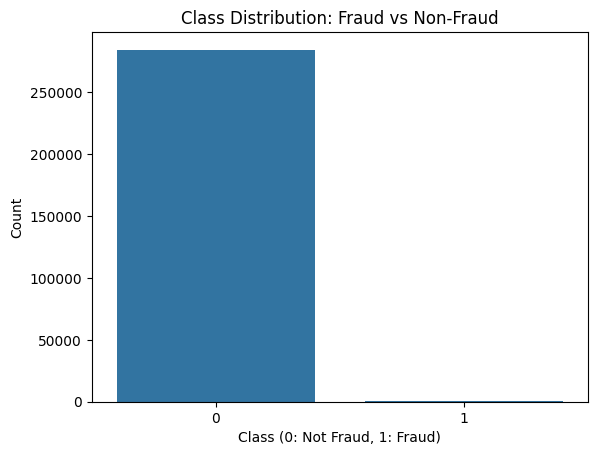

Class
0    284315
1       492
Name: count, dtype: int64
Fraud Percentage: 0.1727%


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class Distribution Plot
sns.countplot(data=df, x='Class')
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Print Class Counts and Ratios
class_counts = df['Class'].value_counts()
print(class_counts)
print(f"Fraud Percentage: {class_counts[1] / class_counts.sum() * 100:.4f}%")

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize 'Amount' and 'Time'
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])

In [4]:
from sklearn.model_selection import train_test_split

# Define Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

# Stratified Split (to maintain class ratio in train and test sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")

Training Set Size: (227845, 30)
Testing Set Size: (56962, 30)


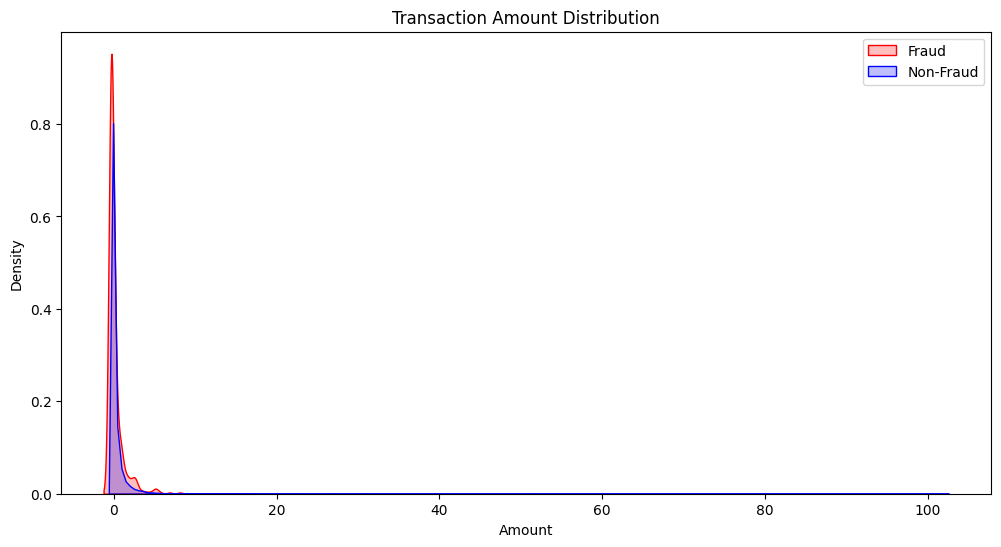

In [5]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

plt.figure(figsize=(12, 6))
sns.kdeplot(fraud['Amount'], color='red', label='Fraud', fill=True)
sns.kdeplot(non_fraud['Amount'], color='blue', label='Non-Fraud', fill=True)
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

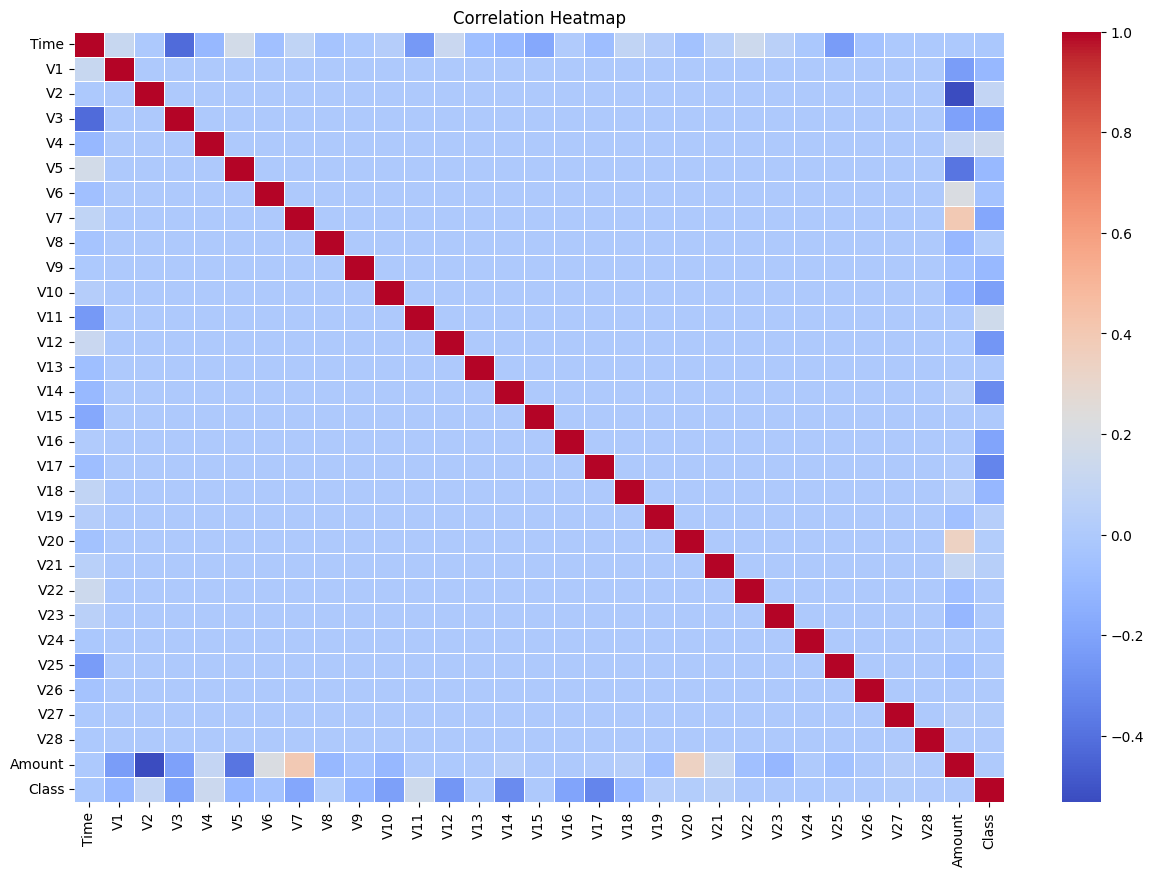

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56851    13]
 [   35    63]]


In [8]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
# Logistic Regression with Class Weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

[[55475  1389]
 [    8    90]]


In [9]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the Model
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

/Users/mohan/Desktop/credit fraud detect/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [00:21:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[56857     7]
 [   19    79]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9743
